## 5.7 로지스틱 회귀

* 지도학습 : 분류, 회귀

복습문제: 

    1) 지도학습과 비지도학습의 차이는? 
    y 변수가 있는 것 (답이 있다)
    y 변수가 없다 (답이 없다)
    
    2) 분류와 회귀의 차이는?
    분류는 타겟데이터가 범주형이고 회귀는 타겟데이터가 연속형이다.

로지스틱회귀 : 선형회귀 방법을 이용한 분류 알고리즘 (지도학습, 교재 332쪽)

1) 유방암 데이터

* 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
type(cancer)

sklearn.utils._bunch.Bunch

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

(교재 234쪽에 이 데이터에 대한 설명이 나와있으니 참조할 것.)

breast cancer data는 가슴에 생긴 혹(breast mass) 영상 자료에서 얻은 세포핵의 10 가지 특성과 그 혹이 유방암인지 아닌지 여부를 나타내는 데이터다. 이 데이터의 target 변수는 두 값을 갖는데, 전체 569개 데이터 중에서 212 개는 악성종양(Malignant, 값은 0), 357개는 악성이 아닌 종양(Benign, 값은 1)이다.

세포핵의 10 가지 특성 각각에 대해 평균, 표준편차, 가장 나쁜(또는 최대)값 세 가지를 구해서 변수로 만들었으므로 feature 변수는 모두 30개다. 

그 30개 feature 변수를 가지고 유방암 여부를 분류하려 한다.

복습문제 : 보스턴 집값 데이터와 유방암 데이터의 큰 차이점은?\
: target data가 다르다. (보스턴 - 연속형 , 유방암 - 범주형)

In [5]:
cancer.target.shape

(569,)

In [6]:
import numpy as np
np.bincount(cancer.target)

array([212, 357])

In [7]:
cancer.data.shape

(569, 30)

In [8]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

우리는 4장에서 분류 알고리즘을 공부할 때 이 데이터를 데이터프레임으로 만든 적이 있다(교재 234-5쪽)

In [9]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
cancer_df.shape

(569, 31)

cancer.data.shape과 cancer_df.shape의 결과가 다른 이유는?\
: target data를 추가했기 때문이다.

In [11]:
print(cancer_df['target'].value_counts())
print(cancer.target_names) # 1 과 0 순

1    357
0    212
Name: target, dtype: int64
['malignant' 'benign']


In [12]:
import numpy as np
np.bincount(cancer.target) # 0 과 1 순

array([212, 357])

In [13]:
print(cancer.target_names) # 0 과 1 순

['malignant' 'benign']


value_counts() 결과를 해석할 때 범주들의 순서에 유의할 것. np.bincount()를 이용해도 같은 결과를 볼 수 있는데 순서는 다르다.

* 데이터 전처리, 데이터 분할

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

30개 변수를 평균 0, 분산 1이 되도록 scale을 조정했다. 아래와 같이 확인해보자. 열별로 평균, 표준편차를 계산하기 위해 `axis=0`옵션을 추가했다.

In [15]:
data_scaled.mean(axis = 0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [16]:
data_scaled.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

feature와 target 데이터를 7:3의 비율로 train, test set으로 나누자.

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, 
                                                      test_size=0.3, random_state=0)

In [18]:
X_test.shape

(171, 30)

In [19]:
np.bincount(y_test)

array([ 63, 108])

In [20]:
np.bincount(y_train)

array([149, 249])

2) 로지스틱 함수

* [로지스틱 함수](https://en.wikipedia.org/wiki/Logistic_function) : S자 모양 sigmoid 함수

$ p(x) =1/(1+e^{-x})= e^{x}/(1+e^{x}) $

* 오즈(odds), [로짓 함수](https://en.wikipedia.org/wiki/Logit) : the inverse of the standard logistic function 

odds = $ \left({\frac {p}{1-p}}\right)$


$ \rm{logit} (p)=\log \left({\frac {p}{1-p}}\right)\quad {\text{for}}\quad p\in (0,1) $

* 오즈비(odds ratio) = 승산비


오즈비 : $ R = \left({\frac {{p_{1}}/(1-p_{1})}{{p_{2}}/(1-p_{2})}}\right)$

$ \operatorname {log} (R)=\log \left({\frac {{p_{1}}/(1-p_{1})}{{p_{2}}/(1-p_{2})}}\right)=\log \left({\frac {p_{1}}{1-p_{1}}}\right)-\log \left({\frac {p_{2}}{1-p_{2}}}\right)=\operatorname {logit} (p_{1})-\operatorname {logit} (p_{2})\,. $


여기서 잠깐, sigmoid 함수를 그려서 모양을 살펴보자.

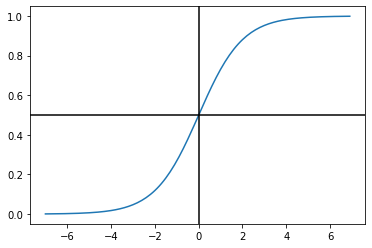

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

x = np.arange(-7, 7, 0.1)
plt.plot(x, sigmoid(x))
plt.axvline(0, color='k')
plt.axhline(0.5, color='k')
plt.show()

위와 같은 이유는 확률은 0과 1사이에 존재하는데 선형일 경우에는 0과 1을 벗어나 버린다. 그러므로 양변에 log를 취해줌으로서 0과 1사이를 벗어나지 않는 S자 모양의 함수를 만들어 낼 수 있다.

3) 로지스틱 회귀(logistic regression)

$p$를 양성일 확률이라고 할 때,

$ {\displaystyle {\rm logit} (p)=\log \left( {\frac {p}{1-p}} \right)} =w _{0}+w _{1}x_{1}+w _{2}x_{2}+\cdots +w _{m}x_{m} $

$ {\displaystyle p ={\frac {1}{1+e^{-(w _{0}+w _{1}x_{1}+w _{2}x_{2}+\cdots +w _{m}x_{m})}}}} $

`0.5보다 크면 1 , 0.5보다 작으면 0`

`최소제곱법으로 추정하는 방법이 아니다. 확률을 추정`

4) 로지스틱 회귀를 이용한 유방암 분류

로지스틱 회귀를 이용하여 분류 모델을 학습하고 예측해보자. 로지스틱 회귀를 위한 클래스는

`from sklearn.linear_model import LogisticRegression`

와 같이 부르면 된다. LogisticRegression 클래스는 규제가 있는 모델(regularized logistic regression )을 만든다. 규제의 종류는 `penalty=`로 지정할 수 있으며, **L2 규제가 기본값**이다. 또 규제의 강도는 `C`값으로 지정할 수 있으며 `C가 작을수록 규제는 강력해진다.` 자세한 내용은 [설명](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)을 볼 것.

In [22]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

* 회귀계수 추정 결과

In [23]:
lr_clf.coef_

array([[-0.25965337, -0.58891309, -0.27527119, -0.35070364, -0.13501664,
         0.41458176, -0.67094946, -0.74096029, -0.37987661,  0.03289321,
        -1.35087219,  0.14092099, -0.90852156, -0.98001244,  0.25957915,
         0.92374666, -0.13448413, -0.34937963,  0.16812679,  0.91359164,
        -0.8473647 , -0.91043792, -0.73517119, -0.84764528, -0.56888501,
         0.17670599, -0.82594672, -1.08228373, -0.48409262, -0.60758107]])

In [24]:
lr_clf.intercept_

array([0.04258607])

target 변수를 `0, 1로 분류할 확률을 아래와 같이 구할 수 있다.` 두 확률을 비교해서 확률이 큰 범주로 분류한다.

In [25]:
pred_pr = lr_clf.predict_proba(X_test) #test에 대한 예측확률
pred_pr[:20]

array([[9.98645694e-01, 1.35430649e-03],
       [3.84282175e-02, 9.61571783e-01],
       [1.30562858e-03, 9.98694371e-01],
       [1.03849030e-02, 9.89615097e-01],
       [2.45997949e-04, 9.99754002e-01],
       [5.90660606e-03, 9.94093394e-01],
       [1.53858124e-04, 9.99846142e-01],
       [1.66513655e-03, 9.98334863e-01],
       [8.61333455e-05, 9.99913867e-01],
       [2.37564216e-06, 9.99997624e-01],
       [2.14530404e-01, 7.85469596e-01],
       [7.58383388e-02, 9.24161661e-01],
       [1.57971029e-05, 9.99984203e-01],
       [4.78248412e-01, 5.21751588e-01],
       [4.37381550e-01, 5.62618450e-01],
       [9.95842423e-01, 4.15757735e-03],
       [6.20911666e-03, 9.93790883e-01],
       [9.99995710e-01, 4.28969606e-06],
       [9.99900609e-01, 9.93913010e-05],
       [9.99999997e-01, 3.12772905e-09]])

lr_clf.coef_의 가장 첫번째 값은 음수다. 무슨 의미일까? 다음 그림을 보고 설명해보라. 여기서 `X_test[:,0]`은 test data의 첫번째 변수이고 `pred_pr[:,1]`은 각 데이터가 1로 분류될 확률이다.

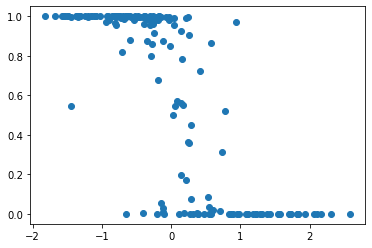

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], pred_pr[:,1])

* 예측 결과

모형으로 확률 p를 추정한 다음, $p \geq 0.5$이면 1로 분류하고 아니면 0으로 분류한다.

In [27]:
lr_preds[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [28]:
y_test[:20]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [29]:
(y_test == lr_preds).sum()

167

171개의 test data 가운데 167개를 제대로 분류해서 정확도가 167/171 = 97.7%가 되었다.

* train data, test data 에서의 분류 정확도

분류 성능 평가 방법은 교재 3장을 보라. `accuracy_score`는 정확도(p. 155)를, `roc_auc_score`는 AUC값(p. 173)을 구해준다.

In [30]:
lr_clf.score(X_train, y_train)

0.9899497487437185

In [31]:
lr_clf.score(X_test, y_test)

0.9766081871345029

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


5) 최적 hyper parameter 선택

`GridSearchCV`를 이용해서 L1, L2 두 가지 규제에 대해 규제의 강도를 나타내는 C의 최적값을 찾아보자.

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore') 

In [34]:
params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


6) multinomial logistic regression (softmax regression)

target 변수의 `범주가` 둘이 아니라 `셋 이상인 경우`. iris data로 세 가지 품종 분류를 연습해보자.

In [35]:
from sklearn import datasets 
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(iris.data, iris.target, 
                                                      test_size=0.3, random_state=0)

In [37]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class = "multinomial") #3개이상의 범주를 갖는
softmax_reg.fit(X_train, y_train)
pred = softmax_reg.predict(X_test)
pred_prob = softmax_reg.predict_proba(X_test)

In [38]:
pred_prob[:10]

array([[1.31729638e-04, 5.98426313e-02, 9.40025639e-01],
       [1.33603352e-02, 9.57039165e-01, 2.96005001e-02],
       [9.82918663e-01, 1.70812813e-02, 5.56692687e-08],
       [1.60530839e-06, 2.60915430e-02, 9.73906852e-01],
       [9.68272501e-01, 3.17272634e-02, 2.35594986e-07],
       [2.47780085e-06, 6.75562380e-03, 9.93241898e-01],
       [9.80356706e-01, 1.96431910e-02, 1.03134439e-07],
       [3.00883313e-03, 7.50198776e-01, 2.46792391e-01],
       [1.62312664e-03, 7.41330653e-01, 2.57046220e-01],
       [2.11406640e-02, 9.32800190e-01, 4.60591462e-02]])

In [39]:
pred[:10]

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [40]:
softmax_reg.score(X_test, y_test)

0.9777777777777777

In [41]:
softmax_reg.score(X_train, y_train)

0.9809523809523809

C의 값을 바꾸어보자.

In [42]:
softmax_reg = LogisticRegression(multi_class = "multinomial", C=1)
softmax_reg.fit(X_train, y_train)
pred = softmax_reg.predict(X_test)
pred_prob = softmax_reg.predict_proba(X_test)
softmax_reg.score(X_test, y_test)

0.9777777777777777

In [43]:
softmax_reg.score(X_train, y_train)

0.9809523809523809

복습문제 : titanic data를 logistic-regresstion 방법으로 분석할 수 있을까?

<u>교재 2장 131-145쪽을 보자. 또한 158-174쪽에 있는 '평가(정밀도, 재현율 등)'도 복습하자.</u>

## 5.8 회귀 트리

tree model은 `target 변수가 범주형변수이면 분류 모형`이 되고 `연속형 변수이면 회귀 모형`이 된다. 분류를 위한 트리 모형은 `from sklearn.tree import DecisionTreeClassifier`와 같이 불러쓴 바 있는데 회귀 트리 모형은 `from sklearn.tree import DecisionTreeRegressor`와 같이 불러쓸 수 있다. 도움말은 [여기](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree#sklearn.tree.DecisionTreeRegressor)서 찾아보자.

트리를 이용한 부스팅 방법(RandomForest, GradientBoosting, XGBoost 등)들 역시 분류 뿐 아니라 회귀에도 이용할 수 있다(클래스의 이름들은 교재 337쪽 참조). 

교재 335-336쪽 그림은 피처변수가 하나인 경우 회귀트리를 설명하고 있다. leaf node에서 target 변수의 범주를 예측하는 분류와 달리 회귀트리는 leaf node에 들어있는 데이터들에 대해 target 변수의 평균값을 구한다. 

교재에서 이용하는 데이터는 보스턴 주택가격 데이터이다. 먼저 sklearn.tree 안에 있는 `DecisionTreeRegressor`를 이용해서 회귀트리를 연습해보자.

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
type(boston)

sklearn.utils.Bunch

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

In [5]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
X_train , X_test, y_train , y_test = train_test_split(X_data, y_target, 
                                                      test_size=0.3, random_state=0)

트리 그림을 간단하게 만들기 위해 `max_depth = 2`로 두고 회귀나무를 만들어보자.

In [53]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=0)

tree_reg.fit(X_train, y_train)
pred = tree_reg.predict(X_test)

tree_reg.score(X_test, y_test)

0.622596538377147

In [55]:
y_test[:20]

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
15     19.9
487    20.6
340    18.7
310    16.1
102    18.6
418     8.8
411    17.2
446    14.9
386    10.5
162    50.0
299    29.0
480    23.0
196    33.3
175    29.4
37     21.0
Name: PRICE, dtype: float64

위에서 만든 회귀 트리를 그림으로 그려보자 (Graphviz에 대해서는 교재 191-2쪽에서 복습할 것).

(주피터 노트북에서 Graphviz를 이용하려면 prompt에서 아래와 같이 입력해서 패키지를 설치해야한다 conda install python-graphviz)

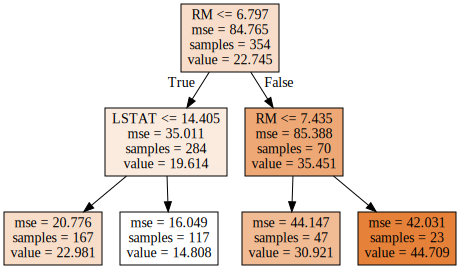

In [56]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(tree_reg, out_file ="tree.dot", feature_names=boston.feature_names, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

value : 집값의 평균값

이번에는 `max_depth`를 지정하지 않고 회귀트리를 만들어보자.

In [57]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
pred = tree_reg.predict(X_test)
tree_reg.score(X_test, y_test)

0.6835179161458892

나무를 복잡하게 만들어도 $R^2$ 값이 그다지 커지지 않았다. 

이번에는 랜덤포레스트 회귀모형으로 분석해보자.

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)
rf_reg.score(X_test, y_test)

0.8286153119401956

- `퀴즈 1) 회귀계수들은 어디 있는가?`

: 방정식을 만들어서 추정하는 법이 아니다.

앞에서 공부한 선형회귀모델로 보스턴집값 데이터를 분석한 결과를 비교해보자.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'. format(mse, rmse))

MSE : 27.196 , RMSE : 5.215


In [60]:
lr.score(X_test, y_test)

0.6733825506400175

In [61]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 37.937107741833316
회귀 계수값: [ -0.1   0.    0.    2.5 -16.2   3.9  -0.   -1.5   0.2  -0.   -1.    0.
  -0.5]


In [62]:
y_preds[:20]

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551])

- `퀴즈 2) 회귀트리를 위해 feature 변수의 표준화가 필요할까?`

아래에서 보듯 선형회귀에서는 표준화 덕분에 회귀계수 추정값들이 달라졌다.

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

`위에서 train data를 표준화할 때에는 fit_transform()을, test data에 대해서는 transform()을 적용한 이유는?` (p.128)

: 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있습니다.

In [64]:
lr= LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds = lr.predict(X_test_scaled)

print('절편 값 :', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_,1))

절편 값 : 22.7454802259887
회귀 계수값 : [-1.   1.1  0.1  0.6 -1.9  2.7 -0.3 -3.1  2.1 -1.9 -2.3  0.6 -3.4]


target 변수 예측값도 달라질까?

: 달라지지 않는다.(회귀분석에서는 스케일링을 하든 안하든 예측값은 같다.)

영상(4) 37분 19초 : 회귀분석에서 R스퀘어, 예측값은 어떻게 계산이 되는가를 알아봐야한다. 

In [65]:
y_preds[:20]

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551])

$R^2$ 값은?

In [66]:
lr.score(X_test_scaled, y_test)

0.6733825506400196

표준화한 데이터로 만든 회귀 트리에서는 어떨까?

In [67]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=0)
tree_reg.fit(X_train_scaled, y_train)
pred = tree_reg.predict(X_test_scaled)

tree_reg.score(X_test_scaled, y_test)

0.622596538377147

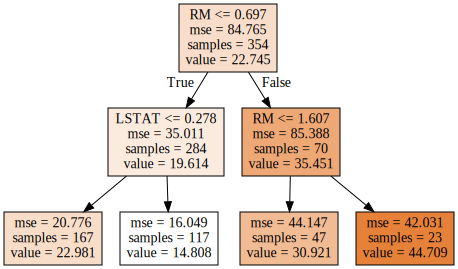

In [69]:
export_graphviz(tree_reg, out_file ="tree.dot", feature_names=boston.feature_names, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

feature 변수들을 표준화해서 회귀 트리를 만들어도 결과는 달라지지 않았다.

**즉, 회귀트리를 만들기 위해서 변수 표준화를 할 필요가 없다.**

회귀트리에서는 회귀계수를 계산할 수는 없지만 `tree_reg.featrue_importances_` 또는 `rf_reg.feature_importances_` 를 이용해서 feature 변수들의 중요도를 비교해볼 수는 있다.

<AxesSubplot:>

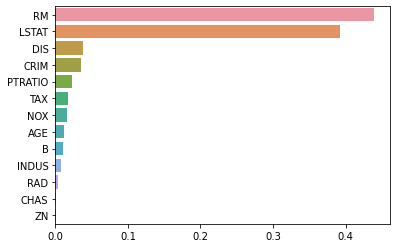

In [70]:
import seaborn as sns
%matplotlib inline

rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

<AxesSubplot:>

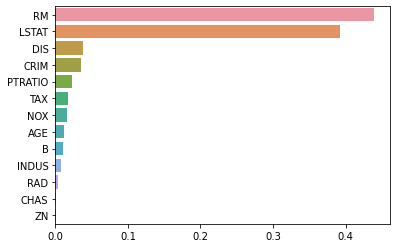

In [71]:
import seaborn as sns
%matplotlib inline

tree_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)